# Test code for the Mandelbrot set

## Naive solution

* Define the important functions: $\mathcal{M}(c) = \dfrac{\imath(c)}{I}$ for colouring the figure, $z_{i+1} = z_i^2 + c$ to calculate the value of the plots, and finally the iteration of a single plot.
* Define the real and imaginary meshes with a specific resolution.
* Calculate the value of each point.
* Plot the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def progress(i: int, I: int):
    r"""
    Helps evaluate how fast a number passed the threshold.
    
    $\mathcal{M}(c) = \dfrac{\imath(c)}{I}$
    """
    return i/I

def mandelbrot_eq(z: int|float, c: complex):
    r"""
    Quadratic complex mapping.    
    
    $z_{i+1} = z_i^2 + c$
    """
    return z**2 + c

def iteration(c: complex, I: int, T: int|float):
    r"""
    Carry out a naive iteration.
    
    Return $\mathcal{M}(c)$ once we pass the threshold T.
    """
    z = 0
    for i in range(1, I+1):
        z = mandelbrot_eq(z, c)
        if abs(z) > T:
            return progress(i, I)
    return progress(i, I)

In [3]:
def initialise_meshgrid(p_re, p_im):
    """
    Initialise the meshgrid used to calculate the values of the Mandelbrot set.
    """
    # a little help from ChatGPT
    real_vals = np.linspace(-2.0, 1.0, p_re)
    imag_vals = np.linspace(1.5, -1.5, p_im)
    
    # mesh grid
    Re, Im = np.meshgrid(real_vals, imag_vals)
    C = Re + 1j * Im
    
    return C

def compute_mandelbrot_set(C, I, T, p_re, p_im):
    """
    """
    output_array = np.zeros(p_re * p_im)
    for idx, c in enumerate(C.flatten()):
        output_array[idx] = iteration(c, I, T)
    return output_array.reshape(p_re, p_im)

In [2]:
def plot_mandelbrot_set(mandelbrot_array):
    plt.pcolormesh(mandelbrot_array, cmap=plt.cm.hot)

In [5]:
import time

In [8]:
C = initialise_meshgrid(1000, 1000)
start_time = time.time()
mandelbrot_set = compute_mandelbrot_set(C, I=100, T=2, p_re=1000, p_im=1000)
end_time = time.time()

speed = end_time - start_time
speed

3.047443151473999

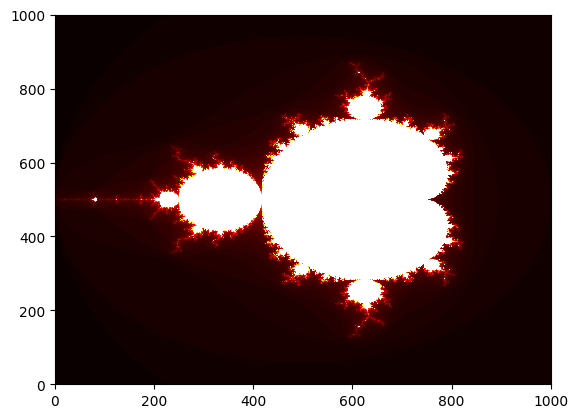

In [67]:
plot_mandelbrot_set(mandelbrot_set)

In [5]:
# values to give resolution
p_re = 10
p_im = 10

# a little help from ChatGPT
real_vals = np.linspace(-2.0, 1.0, p_re)
imag_vals = np.linspace(1.5, -1.5, p_im)

# mesh grid
Re, Im = np.meshgrid(real_vals, imag_vals)

C = Re + 1j * Im
C.shape

(10, 10)

In [21]:
progress_array = np.zeros(p_re * p_im)
progress_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
for idx, c in enumerate(C.flatten()):
    # print(iteration(c, I=100, T=2))
    progress_array[idx] = iteration(c, I=100, T=2)

In [23]:
progress_array = progress_array.reshape(p_re, p_im)
progress_array

array([[0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.02, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02],
       [0.01, 0.03, 0.03, 0.03, 0.04, 0.07, 0.34, 0.04, 0.03, 0.02],
       [0.01, 0.03, 0.04, 0.05, 0.1 , 1.  , 1.  , 0.18, 0.03, 0.02],
       [0.01, 0.05, 0.09, 1.  , 1.  , 1.  , 1.  , 1.  , 0.04, 0.02],
       [0.01, 0.05, 0.09, 1.  , 1.  , 1.  , 1.  , 1.  , 0.04, 0.02],
       [0.01, 0.03, 0.04, 0.05, 0.1 , 1.  , 1.  , 0.18, 0.03, 0.02],
       [0.01, 0.03, 0.03, 0.03, 0.04, 0.07, 0.34, 0.04, 0.03, 0.02],
       [0.01, 0.01, 0.02, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]])

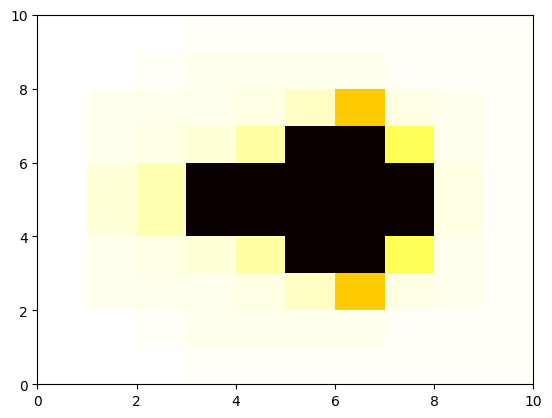

In [37]:
plt.pcolormesh(progress_array, cmap=plt.cm.hot_r)

## Numba compilation

* Probably it's enough to just add the `@njit` decorator

In [9]:
from numba import njit, vectorize, float64, complex128
import time

In [26]:
@njit
def progress(i: int, I: int):
    r"""
    Helps evaluate how fast a number passed the threshold.
    
    $\mathcal{M}(c) = \dfrac{\imath(c)}{I}$
    """
    return i/I

@njit
def mandelbrot_eq(z: int|float, c: complex):
    r"""
    Quadratic complex mapping.    
    
    $z_{i+1} = z_i^2 + c$
    """
    return z**2 + c

@njit
def iteration(c: complex, I: int, T: int|float):
    r"""
    Carry out a naive iteration.
    
    Return $\mathcal{M}(c)$ once we pass the threshold T.
    """
    z = 0
    for i in range(1, I+1):
        z = mandelbrot_eq(z, c)
        if abs(z) > T:
            return progress(i, I)
    return progress(i, I)

In [30]:
def initialise_meshgrid(p_re, p_im):
    """
    Initialise the meshgrid used to calculate the values of the Mandelbrot set.
    """
    # a little help from ChatGPT
    real_vals = np.linspace(-2.0, 1.0, p_re)
    imag_vals = np.linspace(1.5, -1.5, p_im)
    
    # mesh grid
    Re, Im = np.meshgrid(real_vals, imag_vals)
    C = Re + 1j * Im
    
    return C.astype(np.complex128)

@njit
def compute_mandelbrot_set(C, I, T):
    """
    """
    p_im, p_re = C.shape
    # output_array = np.zeros(p_re * p_im)
    output_array = np.empty((p_re, p_im), dtype=np.float64)
    # for idx, c in enumerate(C.flatten()):
        # output_array[idx] = iteration(c, I, T)
    for i in range(p_im):
        for j in range(p_re):
            output_array[i, j] = iteration(C[i, j], I, T)
    # return output_array.reshape(p_re, p_im)
    return output_array

In [2]:
C = initialise_meshgrid(1000, 1000)
start_time = time.time()
mandelbrot_set = compute_mandelbrot_set(C, I=100, T=2)
end_time = time.time()

speed = end_time - start_time
speed

NameError: name 'initialise_meshgrid' is not defined

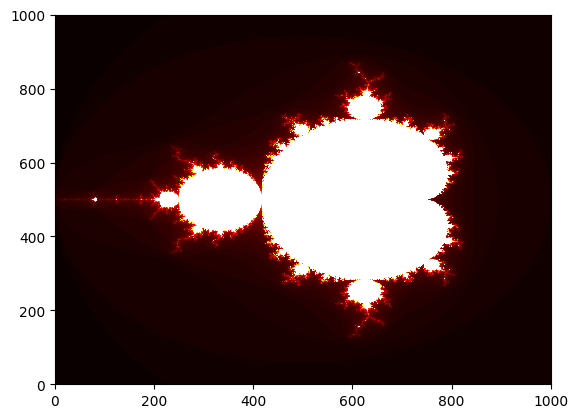

In [86]:
plot_mandelbrot_set(mandelbrot_set)

In [44]:
@vectorize([float64(complex128)], target="parallel")
def mandelbrot_escape(c):
    """
    Numba version with JIT compilation.
    """
    z = 0j
    for i in range(100):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) > 4.0:
            return (i + 1) / 100
    return 1.0

In [45]:
%time
output = mandelbrot_escape(C)
output

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 5.01 μs


array([[0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       ...,
       [0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.01, ..., 0.02, 0.02, 0.02]], shape=(1000, 1000))

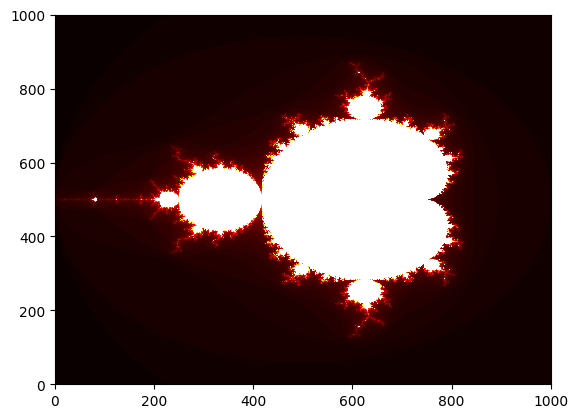

In [46]:
plot_mandelbrot_set(output)

## Multiprocessing

* Using `concurrent.futures`
* Or maybe better: `dask`

In [23]:
from dask import array as da
from dask import delayed
from dask.distributed import Client, LocalCluster
from dask.diagnostics import ProgressBar

ProgressBar().register()

cluster = LocalCluster(n_workers=4, threads_per_worker=2)
client = Client(cluster)

@vectorize(['float64(complex128, int64, float64)'], target="parallel")
def compute_mandelbrot(c, I=100, T=2):
    z = 0j
    threshold = T*T
    for i in range(I+1):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) > threshold:
            return i/100
    return 1.0

@delayed
def mandelbrot_batch(chunk):
    return compute_mandelbrot(chunk, 100, 2)

dask_C = da.from_array(C, chunks=(100, 100))
    

/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50076 instead
  warnings.warn(


In [36]:
%time
mandelbrot_set_array = da.map_blocks(compute_mandelbrot, dask_C, dtype=float, chunks=dask_C.chunks
                                     )
# compute_mandelbrot(dask_C, 100, 2)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 10 μs


In [37]:
mandelbrot_set_array

dask.array<compute_mandelbrot, shape=(1000, 1000), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [38]:
c = mandelbrot_set_array.compute()
c

/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/client.py:3363: UserWarning: Sending large graph of size 15.27 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
2025-07-16 17:11:51,931 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/protocol/core.py", line 175, in loads
    return msgpack.loads(
           ~~~~~~~~~~~~~^
        frames[0], object_hook=_decode_default, use_list=False, **msgpack_opts
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "msgpack/_unpacker.pyx", line 194, in ms

KeyboardInterrupt: 

2025-07-16 17:11:57,278 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-07-16 17:11:57,282 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/asyncio/base_events.py", line 719, in run_until_complete
    return future.result()
           ~~~~~~~~~~~~~^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/nanny.py", line 985, in run
    await worker.finished()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/core.py"

In [28]:
from dask.distributed import Client, progress

client = Client(threads_per_worker=4, n_workers=1)

/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52287 instead
  warnings.warn(
2025-07-16 13:05:23,570 - distributed.worker - WARNING - Mismatched versions found

+-------------+---------------------------------------------+-----------+----------+
| Package     | Worker-bfaba152-0d5a-4410-b0ce-20379c9f87e8 | Scheduler | Workers  |
+-------------+---------------------------------------------+-----------+----------+
| dask        | 2025.7.0                                    | 2025.5.1  | 2025.7.0 |
| distributed | 2025.7.0                                    | 2025.5.1  | 2025.7.0 |
+-------------+---------------------------------------------+-----------+----------+
/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/client.py:1582: VersionMismatchWar

Task exception was never retrieved
future: <Task finished name='Task-18214485' coro=<Client._gather.<locals>.wait() done, defined at /opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/client.py:2377> exception=AllExit()>
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/scientific_computing/lib/python3.13/site-packages/distributed/client.py", line 2386, in wait
    """Want to stop the All(...) early if we find an error"""
        ^^^^^^^^^^^^^^^
distributed.client.AllExit


In [29]:
import time
import random

def costly_simulation(list_param):
    time.sleep(random.random())
    return sum(list_param)

In [30]:
import pandas as pd
import numpy as np

input_params = pd.DataFrame(np.random.random(size=(500, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
input_params.head()

,param_a,param_b,param_c,param_d
0,0.986583,0.093203,0.810798,0.756749
1,0.502944,0.457696,0.743803,0.880689
2,0.779441,0.174694,0.210814,0.482919
3,0.947373,0.126135,0.101565,0.721508
4,0.919093,0.780098,0.709386,0.695229


In [33]:
import dask
lazy_results = []

In [34]:
%%time

for parameters in input_params.values[:10]:
    lazy_result = dask.delayed(costly_simulation)(parameters)
    lazy_results.append(lazy_result)

CPU times: user 788 μs, sys: 912 μs, total: 1.7 ms
Wall time: 1.61 ms


In [35]:
%time
dask.compute(*lazy_results)

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 3.81 μs


(np.float64(2.6473338070979078),
 np.float64(2.58513200398048),
 np.float64(1.6478674208342512),
 np.float64(1.8965806635934666),
 np.float64(3.103805682163756),
 np.float64(3.6405697636097103),
 np.float64(1.517172328028309),
 np.float64(2.7819625849136376),
 np.float64(2.5070802105345886),
 np.float64(1.7478118500528617))